In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.chernobrovov.ru/articles/datasets-for-recomendation-systems.html

Этот набор данных представляет собой список поведений пользователей со столбцами: идентификатор пользователя(User ID), название игры, поведение («покупка» и «игра»), значение(указывает степень, в которой поведение было выполнено — в случае «покупки» значение всегда равно 1, а в случае «игры» значение представляет собой количество часов, в течение которых пользователь играл в игру).

In [2]:
col = ['User_ID', 'Name_game', 'purchase_play', 'Game_hours', '0']
df = pd.read_csv('steam.csv', delimiter=',', names = col) 
df

,User_ID,Name_game,purchase_play,Game_hours,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
...,...,...,...,...,...
199995,128470551,Titan Souls,play,1.5,0
199996,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199997,128470551,Grand Theft Auto Vice City,play,1.5,0
199998,128470551,RUSH,purchase,1.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   User_ID        200000 non-null  int64  
 1   Name_game      200000 non-null  object 
 2   purchase_play  200000 non-null  object 
 3   Game_hours     200000 non-null  float64
 4   0              200000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [4]:
df.drop(columns = ['0'], inplace =True) #удаляем столбец "0"
df

,User_ID,Name_game,purchase_play,Game_hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [5]:
df.drop_duplicates(inplace=True) #удаляем дубликаты
df

,User_ID,Name_game,purchase_play,Game_hours
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
...,...,...,...,...
199995,128470551,Titan Souls,play,1.5
199996,128470551,Grand Theft Auto Vice City,purchase,1.0
199997,128470551,Grand Theft Auto Vice City,play,1.5
199998,128470551,RUSH,purchase,1.0


In [6]:
df.isnull().sum() # Не пропало ни одно значение

User_ID          0
Name_game        0
purchase_play    0
Game_hours       0
dtype: int64

In [7]:
df.shape #199293 записей

(199293, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199293 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   User_ID        199293 non-null  int64  
 1   Name_game      199293 non-null  object 
 2   purchase_play  199293 non-null  object 
 3   Game_hours     199293 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.6+ MB


In [9]:
games = df['Name_game'].unique() #Все игры
games

array(['The Elder Scrolls V Skyrim', 'Fallout 4', 'Spore', ...,
       'Space Colony', 'Life is Hard', 'Executive Assault'], dtype=object)

In [10]:
df['Name_game'].value_counts() # Количество уникальных строк с играми

Dota 2                                  9682
Team Fortress 2                         4646
Counter-Strike Global Offensive         2789
Unturned                                2632
Left 4 Dead 2                           1752
                                        ... 
FORCED Original Soundtrack                 1
Zen of Sudoku                              1
Ballads of Reemus When the Bed Bites       1
Blood & Gold Caribbean!                    1
Jamsouls                                   1
Name: Name_game, Length: 5155, dtype: int64

In [11]:
df['purchase_play'].value_counts() # количество тех, кто купил и кто играл

purchase    128804
play         70489
Name: purchase_play, dtype: int64

<AxesSubplot: >

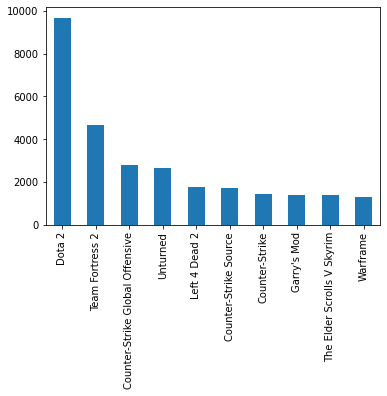

In [12]:
df['Name_game'].value_counts().head(10).plot(kind = 'bar') # Первые 10 игр с наибольшим количеством часов

In [13]:
df['purchase_play'] = df['purchase_play'].replace({'purchase': 0, 'play': 1})

### Модель и обучение модели


In [14]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

Класс Reader используется для анализа файла, содержащего рейтинги, определяет формат данных.

In [15]:
# создание объекта Reader
reader = Reader(rating_scale=(0, 1))
# создание объекта Dataset
data = Dataset.load_from_df(df[['User_ID', 'Name_game', 'purchase_play']], reader)

In [16]:
# Разделение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.2)

SVD (Singular Value Decomposition) - это один из наиболее популярных алгоритмов рекомендательных систем. В библиотеке Surprise реализована модель SVD, которая использует SVD для прогнозирования оценок пользователей для элементов.

Модель SVD в библиотеке Surprise использует матричный подход для рекомендаций. Она представляет оценки пользователей и элементов в виде матрицы, где строки соответствуют пользователям, а столбцы - элементам. Затем она применяет SVD для разложения этой матрицы на три матрицы: матрицу пользователей, матрицу элементов и матрицу сингулярных значений.

Модель SVD в библиотеке Surprise может использоваться для прогнозирования оценок пользователей для элементов, а также для ранжирования элементов по предсказанным оценкам. Она может быть использована для рекомендаций в различных областях, таких как фильмы, музыка, книги и т.д.

In [17]:
# Создание модели SVD 
model = SVD(n_factors=100, n_epochs=100, lr_all=0.001, reg_all=0.02)

In [18]:
#Кросс-валидация модели
from surprise.model_selection import cross_validate
cv_results = cross_validate(model, data, cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.4956  0.4974  0.4959  0.4960  0.4964  0.4963  0.0006  
MAE (testset)     0.4520  0.4530  0.4518  0.4522  0.4526  0.4523  0.0004  
Fit time          77.33   67.54   49.19   48.62   48.24   58.18   12.04   
Test time         0.43    0.39    0.35    0.33    0.35    0.37    0.03    


In [19]:
print('RMSE:', cv_results['test_rmse'].mean())
print('MAE:', cv_results['test_mae'].mean())

RMSE: 0.49625878176214416
MAE: 0.45231206118979095


In [20]:
# Обучение модели на обучающей выборке
model.fit(train_data)

In [21]:
# функция рекомендаций для пользователя
def get_recommendations(user_id, num_recommendations):
    # получение списка игр, которые пользователь еще не играл
    unplayed_games = df.loc[~df['Name_game'].isin(df.loc[df['User_ID'] == user_id]['Name_game'])]['Name_game'].unique()

    # создание списка кортежей с предсказанными рейтингами для игр, которые пользователь еще не играл
    predicted_ratings = [(game, model.predict(user_id, game).est) for game in unplayed_games]

    # сортировка списка по убыванию предсказанных рейтингов и выбор топ-рекомендаций
    recommendations = sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:num_recommendations]

    # создание DataFrame с рекомендациями
    recommendations_df = pd.DataFrame(recommendations, columns=['Name_game', 'predicted_rating'])
    
    # получение списка игр, которые пользователь уже играл
    played_games = df.loc[df['User_ID'] == user_id]['Name_game'].unique()

    # создание DataFrame с играми, которые пользователь уже играл
    played_games_df = pd.DataFrame(played_games, columns=['Name_game'])

    # объединение DataFrame с рекомендациями и DataFrame с играми, которые пользователь уже играл
    recommendations_df = pd.merge(recommendations_df, played_games_df, on='Name_game', how='left')

    # вывод информации о пользователе и играх, которые он уже играл
    print(f"Пользователь с ID {user_id} играл в следующие игры:")
    print(played_games)

    return recommendations_df

In [22]:
get_recommendations(128470551, 5)

Пользователь с ID 128470551 играл в следующие игры:
['The Binding of Isaac Rebirth' 'Path of Exile' 'Arma 2 DayZ Mod'
 'Antichamber' 'Risk of Rain' 'OlliOlli' 'Hammerwatch' 'Torchlight II'
 'Nether' 'Rogue Legacy' 'Mortal Kombat Komplete Edition' 'Fallen Earth'
 'Magic Duels' 'Titan Souls' 'Grand Theft Auto Vice City' 'RUSH']


,Name_game,predicted_rating
0,D.I.P.R.I.P. Warm Up,0.830633
1,Command and Conquer 4 Tiberian Twilight,0.825309
2,Nidhogg,0.820722
3,Section 8 Prejudice,0.818158
4,Yury,0.812503
